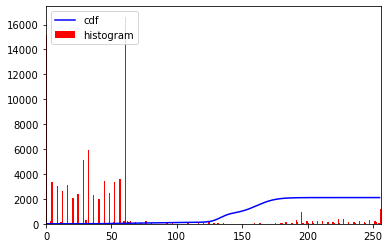

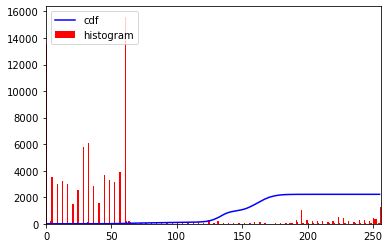

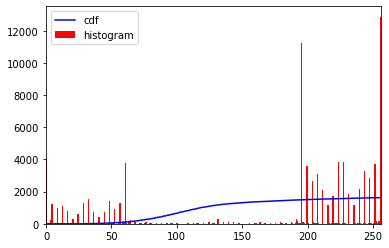

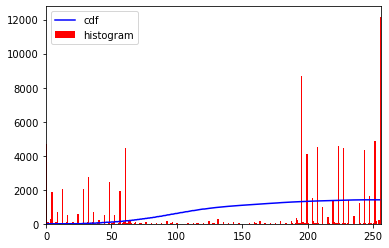

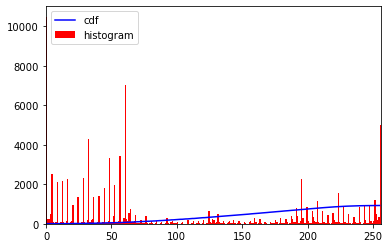

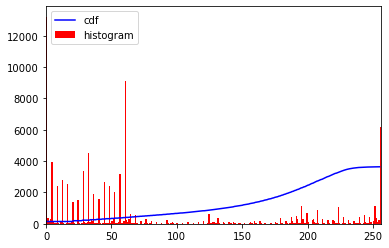

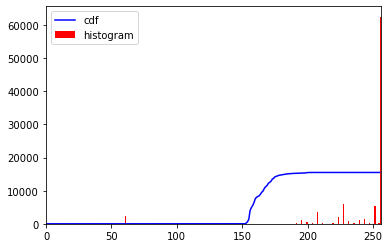

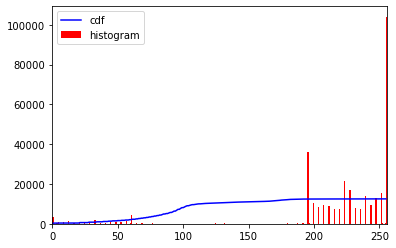

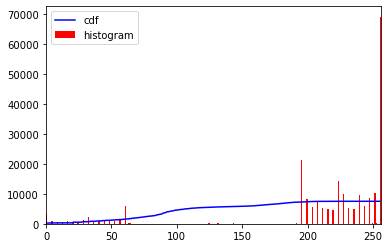

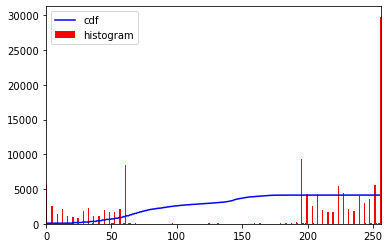

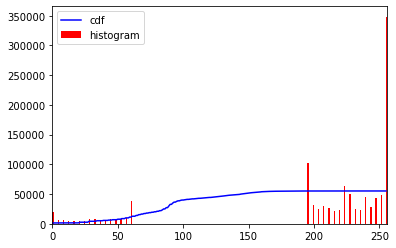

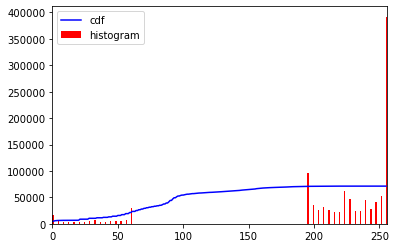

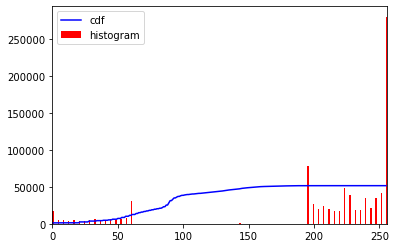

In [4]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

%matplotlib inline

def umbral(center, pixels):
    out = []
    for a in pixels:
        if a >= center:
            out.append(1)
        else:
            out.append(0)
    return out

def get_pixel_by_idx(m, idx, idy, default=0):
    try:
        return m[idx,idy]
    except IndexError:
        return default

def lbp(file):
    img = cv.imread(file, 0)
    # por cada pixel proceso los 8 pixeles circundantes
    for x in range(0, len(img)):
        for y in range(0, len(img[0])):
            center = img[x,y]
            tl = get_pixel_by_idx(img, x-1, y-1)
            tu = get_pixel_by_idx(img, x, y-1)
            tr = get_pixel_by_idx(img, x+1, y-1)
            r = get_pixel_by_idx(img, x+1, y )
            l = get_pixel_by_idx(img, x-1, y )
            bl = get_pixel_by_idx(img, x-1, y+1)
            br = get_pixel_by_idx(img, x+1, y+1)
            bd = get_pixel_by_idx(img, x,   y+1 )

            values = umbral(center, [tl, tu, tr, r, br, bd, bl, l])
            weights = [1, 2, 4, 8, 16, 32, 64, 128]
            acc = 0
            for i in range(0, len(values)):
                acc += weights[i] * values[i]
            
            img.itemset((x,y), acc)

    return img


def plot_histograms(img1, img2):
    hist, bins = np.histogram(img.flatten(),256,[0,256])

    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max()/ cdf.max()

    plt.plot(cdf_normalized, color = 'b')
    plt.hist(img2.flatten(),256,[0,256], color = 'r')
    plt.xlim([0,256])
    plt.legend(('cdf','histogram'), loc = 'upper left')
    plt.show()
    

imagenes = ['ladrillos1.png', 'ladrillos2.png', 'oveja1.png', 'oveja2.png', 'piedras1.png', 
            'piedras2.png', 'cielo.png', 'rbt_scn1_focus.png', 'rbt_scn3_focus.png', 'rbt_scn4_focus.png',
            'rbt_scn2.png', 'rbt_scn3.png', 'rbt_scn4.png']

for file in imagenes:
    img = cv.imread(file, 0)
    extracted = lbp(file)
    plot_histograms(img, extracted)
    cv.imshow('image', extracted)
    cv.waitKey(0)
    cv.destroyAllWindows()